# MNIST - Categorical Classification
> # Model Capacity


In [1]:
import warnings
warnings.filterwarnings('ignore')

# I. MNIST Data_Set Load

In [2]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# II. Data Preprocessing

> ## 1) Reshape and Normalization

* reshape

In [3]:
X_train = X_train.reshape((60000, 28 * 28))
X_test = X_test.reshape((10000, 28 * 28))

* Normalization

In [4]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

> ## 2) One Hot Encoding

In [5]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# III. MNIST Keras Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의
 - 1개의 Hidden Layer & 256개의 Nodes
 - Model Capacity 낮게 조정

In [6]:
from tensorflow.keras import models
from tensorflow.keras import layers

mnist = models.Sequential()
mnist.add(layers.Dense(256, activation = 'relu', input_shape=(28 * 28,)))
mnist.add(layers.Dense(10, activation = 'softmax'))

* 모델 구조 확인

In [7]:
mnist.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

* 모델 학습방법 설정

In [8]:
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 약 4분

In [9]:
%%time

Hist_mnist = mnist.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 6s 12ms/step - loss: 0.3202 - accuracy: 0.9098 - val_loss: 0.1744 - val_accuracy: 0.9517
Epoch 2/100
375/375 [==============================] - 3s 9ms/step - loss: 0.1462 - accuracy: 0.9573 - val_loss: 0.1211 - val_accuracy: 0.9653
Epoch 3/100
375/375 [==============================] - 3s 8ms/step - loss: 0.1012 - accuracy: 0.9705 - val_loss: 0.1019 - val_accuracy: 0.9699
Epoch 4/100
375/375 [==============================] - 4s 10ms/step - loss: 0.0754 - accuracy: 0.9778 - val_loss: 0.0924 - val_accuracy: 0.9732
Epoch 5/100
375/375 [==============================] - 4s 10ms/step - loss: 0.0594 - accuracy: 0.9826 - val_loss: 0.0878 - val_accuracy: 0.9734
Epoch 6/100
375/375 [==============================] - 3s 9ms/step - loss: 0.0477 - accuracy: 0.9863 - val_loss: 0.0912 - val_accuracy: 0.9728
Epoch 7/100
375/375 [==============================] - 3s 8ms/step - loss: 0.0376 - accuracy: 0.9893 - val_loss: 0.0877 - val_accuracy: 0.9

> ## 4) 학습 결과 시각화 - Overfitting

* Loss Visualization

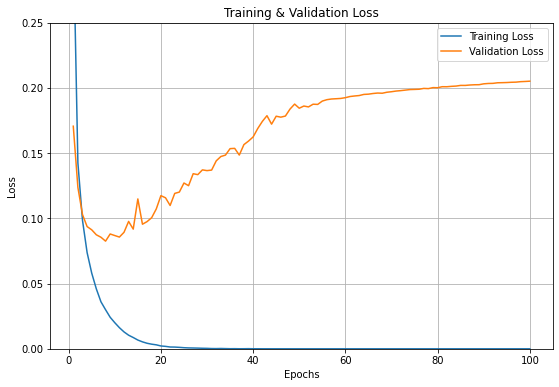

In [10]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [11]:
loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.1628 - accuracy: 0.9827
Loss = 0.16283
Accuracy = 0.98270


# 
# 
# 
# The End
# 
# 
# 